<a href="https://colab.research.google.com/github/coelhoenilda/webscrapping/blob/main/analise_imoveis_perdizes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise exploratoria dos dados imobiliarios


## importando bibliotecas e dataset


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### incluindo os dados em csv em um dataframe 

In [ ]:
dataset = pd.read_csv('Datase_imoveis_2.csv',sep=';')

In [ ]:
dataset

,endereco,valor,area,quartos,vagas,banheiros,pagina
0,"Rua Cayowaá, 1258 - Perdizes, São Paulo - SP",1010000.0,110,3,1,3,1
1,"Rua Campevas, 238 - Perdizes, São Paulo - SP",0.0,106,2,1,4,1
2,"Rua Apinajés, 931 - Perdizes, São Paulo - SP",760000.0,67,2,2,2,1
3,"Rua Cardoso de Almeida, 978 - Perdizes, São Pa...",980000.0,117,3,1,4,1
4,"Rua dos Caetés, 878 - Perdizes, São Paulo - SP",600000.0,70,2,1,2,1
...,...,...,...,...,...,...,...
3523,"Rua Caiubi, 1188 - Perdizes, São Paulo - SP",7300.0,104,3,2,3,99
3524,"Rua Caraíbas - Perdizes, São Paulo - SP",990000.0,105,3,1,3,99
3525,"Rua Coronel Melo de Oliveira - Perdizes, São P...",1800000.0,143,3,4,5,99
3526,"Avenida Antártica - Perdizes, São Paulo - SP",550000.0,106,3,0,2,99


###analisando os tipos de váriaveis

In [ ]:
tipos_dados = pd.DataFrame(dataset.dtypes,columns=['Tipos de Dados'])
tipos_dados.columns.name='Váriaveis'
tipos_dados

Váriaveis,Tipos de Dados
endereco,object
valor,float64
area,int64
quartos,int64
vagas,int64
banheiros,int64
pagina,int64


In [ ]:
print('A base de dados apresenta {} registros (imóveis) e {} variáveis'.format(dataset.shape[0],dataset.shape[1]))

A base de dados apresenta 3528 registros (imóveis) e 7 variáveis


### Verificando a quantidade dados nulos

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3528 entries, 0 to 3527
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   endereco   3528 non-null   object 
 1   valor      3528 non-null   float64
 2   area       3528 non-null   int64  
 3   quartos    3528 non-null   int64  
 4   vagas      3528 non-null   int64  
 5   banheiros  3528 non-null   int64  
 6   pagina     3528 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 193.1+ KB


###** Não existe dados nulos no dataframe

## Excluindo dados sem valor de area e valor

###Como não existe um padrao de dados de inserção de dados na pagina onde foi feito o web scraping, alguns campos podem vir sem informação ou com informações erradas.
### então para essa nálise descritiva vou excluir dados que não possuem area ou valor do imovel. 

In [ ]:
dados = dataset[(dataset['valor']!=0) & (dataset['area']!=0) ]
dados.shape

(3256, 7)

In [ ]:
dados.dtypes

endereco      object
valor        float64
area           int64
quartos        int64
vagas          int64
banheiros      int64
pagina         int64
dtype: object

In [ ]:
dados.head()

,endereco,valor,area,quartos,vagas,banheiros,pagina
0,"Rua Cayowaá, 1258 - Perdizes, São Paulo - SP",1010000.0,110,3,1,3,1
2,"Rua Apinajés, 931 - Perdizes, São Paulo - SP",760000.0,67,2,2,2,1
3,"Rua Cardoso de Almeida, 978 - Perdizes, São Pa...",980000.0,117,3,1,4,1
4,"Rua dos Caetés, 878 - Perdizes, São Paulo - SP",600000.0,70,2,1,2,1
5,"Rua Diana, 649 - Perdizes, São Paulo - SP",950000.0,105,3,1,3,1


## Criando uma nova váriavel
###Para minha análise precisei criar a váriavel do valor por m²

In [ ]:
dados['valor_m2']=(dados.valor/dados.area).round(0)
dados.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,endereco,valor,area,quartos,vagas,banheiros,pagina,valor_m2
0,"Rua Cayowaá, 1258 - Perdizes, São Paulo - SP",1010000.0,110,3,1,3,1,9182.0
2,"Rua Apinajés, 931 - Perdizes, São Paulo - SP",760000.0,67,2,2,2,1,11343.0
3,"Rua Cardoso de Almeida, 978 - Perdizes, São Pa...",980000.0,117,3,1,4,1,8376.0
4,"Rua dos Caetés, 878 - Perdizes, São Paulo - SP",600000.0,70,2,1,2,1,8571.0
5,"Rua Diana, 649 - Perdizes, São Paulo - SP",950000.0,105,3,1,3,1,9048.0


In [ ]:
del dados['pagina']

#Estatística descritiva
### na minha primeira análise cheguei até aqui,
###calculei a média dos valores por metro quadrado
###calculei e valor da proposta como a area construida do imovel
###Levei em conta algums qualitativos, como a construção do metro a 150metro do imovel, e o tipo de imovel e sua localização.
###Na data, eu sabia que existia os outliers que alteravam muito a média mas como não conhecia métodos de tratamente resolvi adotar aquele valor de média.

In [ ]:
dados[['valor','area','valor_m2']].describe().round(2)

,valor,area,valor_m2
count,3256.00,3256.00,3256.00
mean,1563043.83,132.39,11200.54
std,1181517.20,62.66,3855.56
min,1700.00,18.00,17.00
25%,796500.00,89.00,8929.00
50%,1250000.00,119.00,10664.50
75%,2000000.00,172.25,13060.00
max,10314342.00,451.00,38413.00


In [ ]:
%matplotlib inline
plt.rc('figure',figsize=(20,10))

#Identificando e removendo Outliers

###Metodo Boxplot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faab32517d0>]],
      dtype=object)

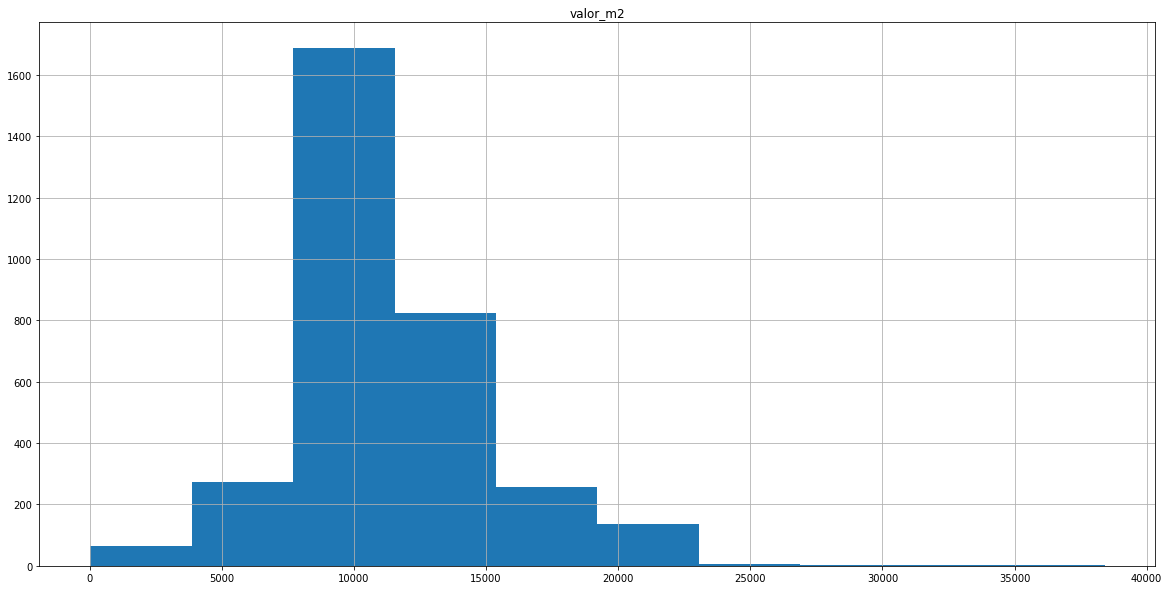

In [ ]:
dados.hist(['valor_m2'])

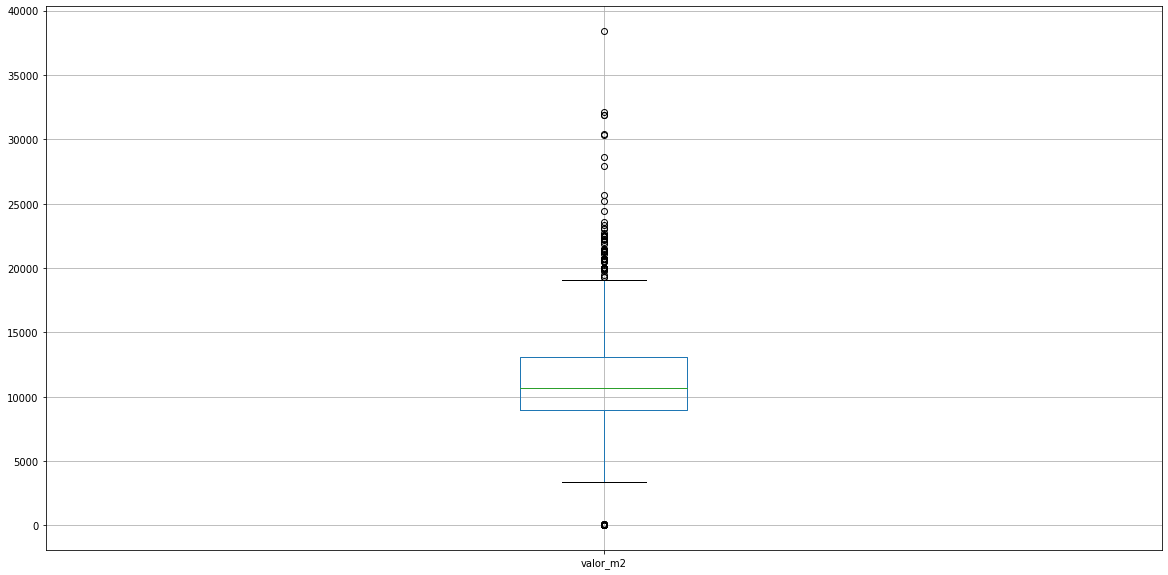

In [ ]:
dados.boxplot(['valor_m2'])

In [ ]:
valor_m2 = dados.valor_m2

In [ ]:
Q1 = valor_m2.quantile(.25)
Q3 = valor_m2.quantile(.75)
IIQ = Q3-Q1
limite_inferior = Q1 -1.5*IIQ
limite_superior = Q3 +1.5*IIQ

In [ ]:
selecao = (valor_m2 >= limite_inferior)&(valor_m2<=limite_superior)
dados_s_out = dados[selecao]

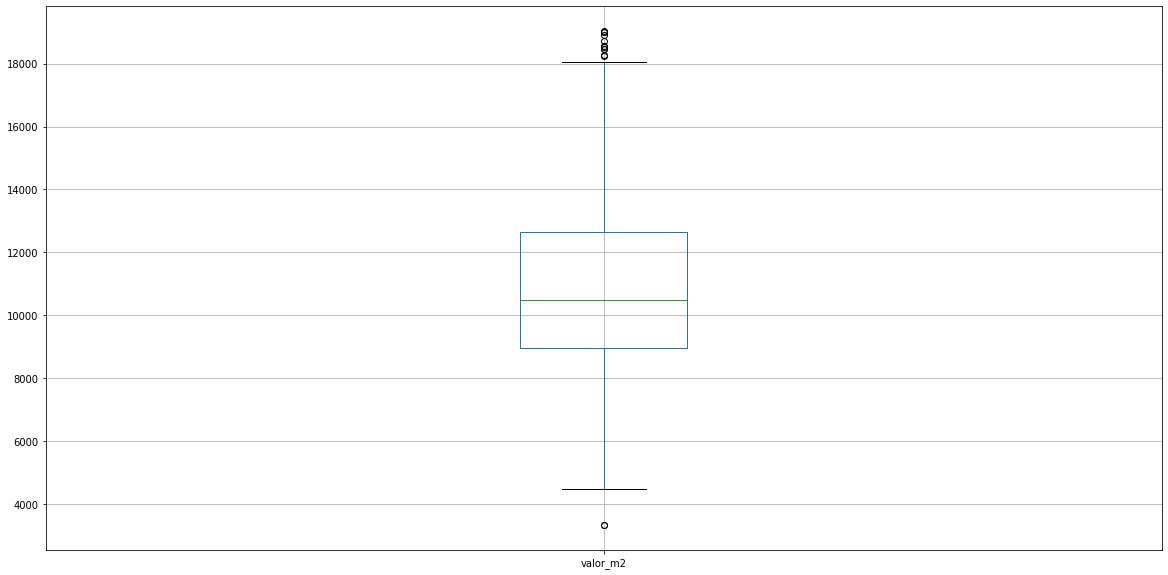

In [ ]:
dados_s_out.boxplot(['valor_m2'])

##Salvando os dados sem outliers

In [ ]:
dados_s_out.to_csv('dados_s_out.csv',sep=';',index=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faab30a0610>]],
      dtype=object)

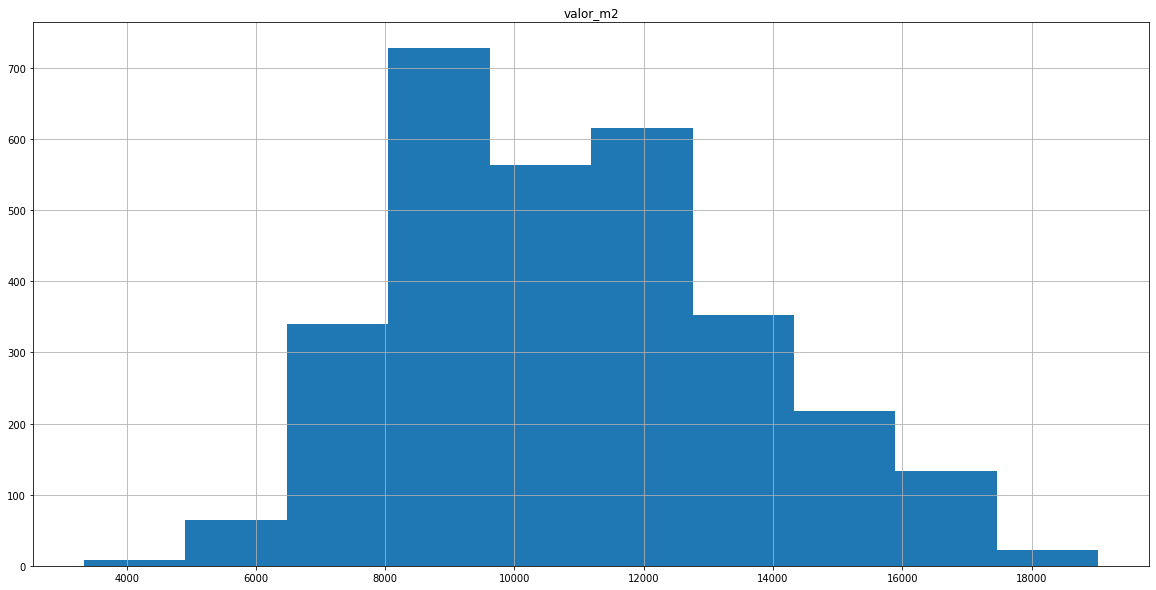

In [ ]:
dados_s_out.hist(['valor_m2'])

In [ ]:
dados_s_out[['valor','area','valor_m2']].describe()

,valor,area,valor_m2
count,3.044000e+03,3044.000000,3044.000000
mean,1.453098e+06,128.999671,10914.934297
std,8.851847e+05,58.886404,2726.816881
min,1.680000e+05,18.000000,3337.000000
25%,8.000000e+05,85.750000,8968.500000
50%,1.200000e+06,117.000000,10497.500000
75%,1.950000e+06,167.000000,12658.000000
max,7.200000e+06,451.000000,19034.000000



#Explorando os demais dados
##O numero de banheiros, quartos e garagens influenciam no valor do imovel?

In [ ]:
dataset_2 = pd.read_csv('dados_s_out.csv',sep=';')
dataset_2

,endereco,valor,area,quartos,vagas,banheiros,valor_m2
0,"Rua Cayowaá, 1258 - Perdizes, São Paulo - SP",1010000.0,110,3,1,3,9182.0
1,"Rua Apinajés, 931 - Perdizes, São Paulo - SP",760000.0,67,2,2,2,11343.0
2,"Rua Cardoso de Almeida, 978 - Perdizes, São Pa...",980000.0,117,3,1,4,8376.0
3,"Rua dos Caetés, 878 - Perdizes, São Paulo - SP",600000.0,70,2,1,2,8571.0
4,"Rua Diana, 649 - Perdizes, São Paulo - SP",950000.0,105,3,1,3,9048.0
...,...,...,...,...,...,...,...
3039,"Rua Ministro Godói - Perdizes, São Paulo - SP",1590000.0,156,3,2,3,10192.0
3040,"Rua Caraíbas - Perdizes, São Paulo - SP",990000.0,105,3,1,3,9429.0
3041,"Rua Coronel Melo de Oliveira - Perdizes, São P...",1800000.0,143,3,4,5,12587.0
3042,"Avenida Antártica - Perdizes, São Paulo - SP",550000.0,106,3,0,2,5189.0


### Excluindo dados onde banheiro/vagas/quartos não foram informados


###numero de linhas antes da exclusao

In [ ]:
print('Numero de linhas do dataset é {}'.format(dataset_2.shape[0]))

Numero de linhas do dataset é 3044


In [ ]:
dados = dataset_2[(dataset_2['valor']!=0)&(dataset_2['quartos']!=0) & (dataset_2['vagas']!=0)&(dataset_2['banheiros']!=0) ]

###numero de linhas após a exclusao


In [ ]:
print('Numero de linhas do dataset é {}'.format(dados.shape[0]))

Numero de linhas do dataset é 2891


In [ ]:
dados.head()

,endereco,valor,area,quartos,vagas,banheiros,valor_m2
0,"Rua Cayowaá, 1258 - Perdizes, São Paulo - SP",1010000.0,110,3,1,3,9182.0
1,"Rua Apinajés, 931 - Perdizes, São Paulo - SP",760000.0,67,2,2,2,11343.0
2,"Rua Cardoso de Almeida, 978 - Perdizes, São Pa...",980000.0,117,3,1,4,8376.0
3,"Rua dos Caetés, 878 - Perdizes, São Paulo - SP",600000.0,70,2,1,2,8571.0
4,"Rua Diana, 649 - Perdizes, São Paulo - SP",950000.0,105,3,1,3,9048.0


Numero de banheiros


** Visualmente sim, o valor do imovel aumenta conforme a quantidade banheiros

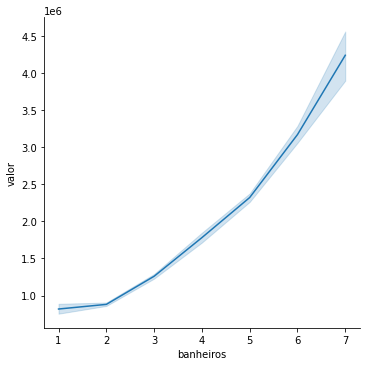

In [ ]:
sns.relplot(x='banheiros',y='valor',kind='line', data=dados)

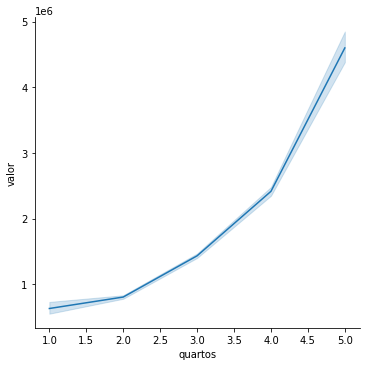

In [ ]:
sns.relplot(x='quartos',y='valor',kind='line', data=dados)

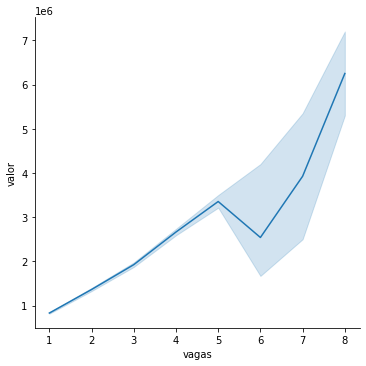

In [ ]:
sns.relplot(x='vagas',y='valor',kind='line', data=dados)

##Visualmente a quantidade de quartos/banheiros/vagas é proporcional ao preço,
###Mas acredito que isso, tenha mais relação com a quantidade de area, do que a quantidade/tipos de comodos.




#Analise sobre o valor por metro quadrado

##Para confirmar a analise acima vamos verificar a quantidade banheiro/vagas/quartos em função valor do metro quadrado dos imoveis

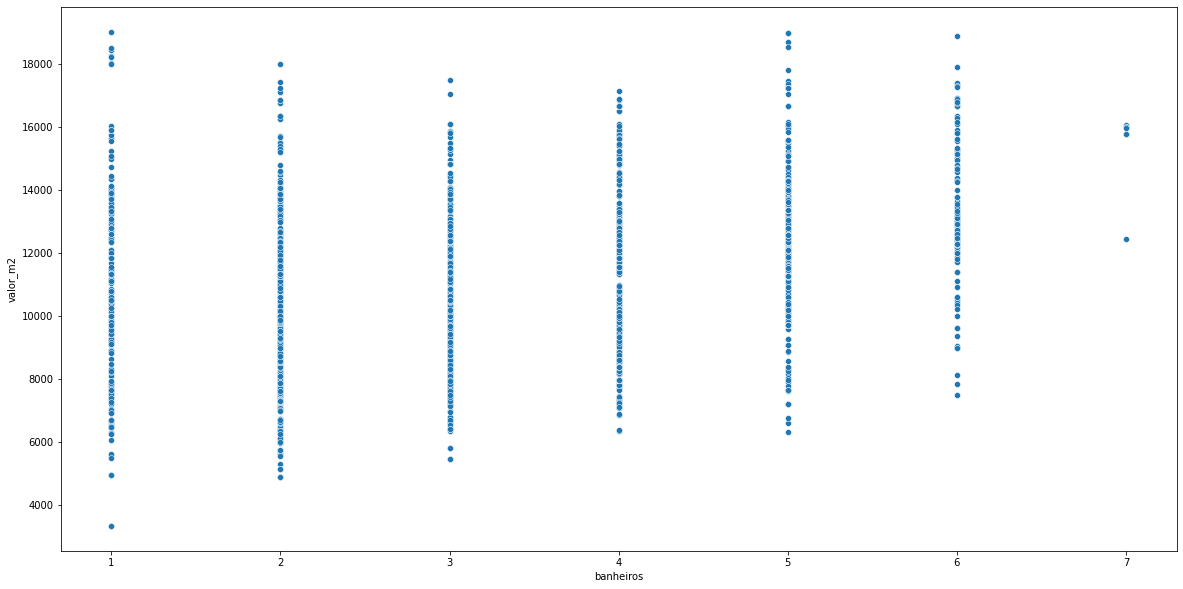

In [ ]:
sns.scatterplot(x='banheiros',y='valor_m2', data=dados)

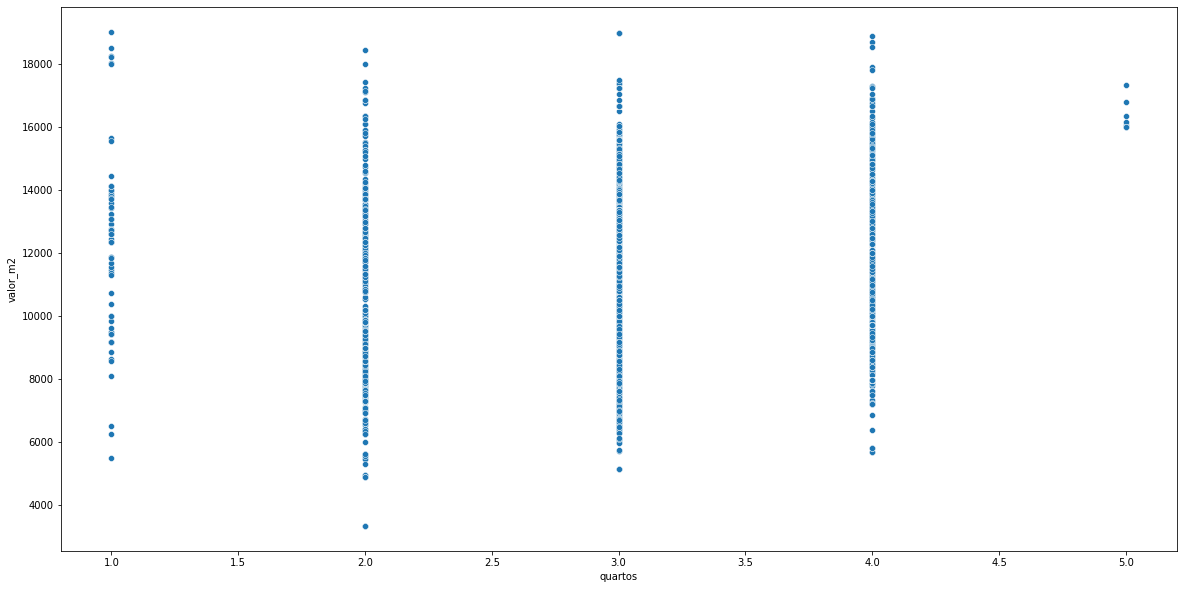

In [ ]:
sns.scatterplot(x='quartos',y='valor_m2', data=dados)

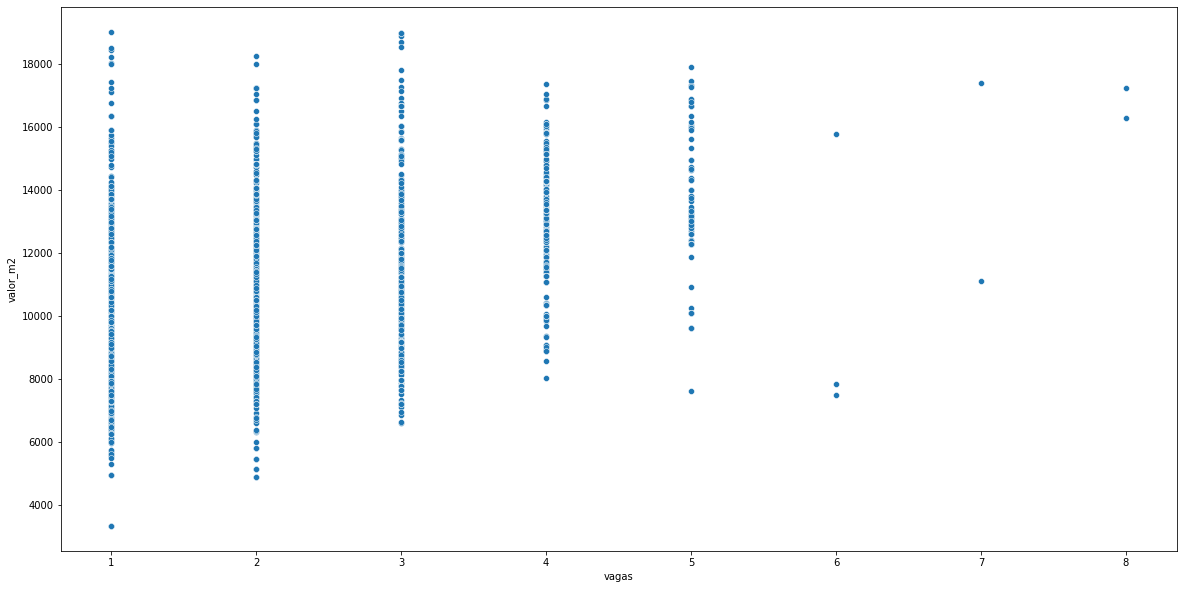

In [ ]:
sns.scatterplot(x='vagas',y='valor_m2', data=dados)

##**Visivelmente não existe relação entre o valor do m² do imovel e quantidade de banheiro/quartos/vagas

In [ ]:
dados.head()

,endereco,valor,area,quartos,vagas,banheiros,valor_m2
0,"Rua Cayowaá, 1258 - Perdizes, São Paulo - SP",1010000.0,110,3,1,3,9182.0
1,"Rua Apinajés, 931 - Perdizes, São Paulo - SP",760000.0,67,2,2,2,11343.0
2,"Rua Cardoso de Almeida, 978 - Perdizes, São Pa...",980000.0,117,3,1,4,8376.0
3,"Rua dos Caetés, 878 - Perdizes, São Paulo - SP",600000.0,70,2,1,2,8571.0
4,"Rua Diana, 649 - Perdizes, São Paulo - SP",950000.0,105,3,1,3,9048.0
